数据前5行：
   user_id    name     location  total_influence        country   event_type  \
0   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
1   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
2   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
3   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
4   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   

  event_action                 event_time  
0        added  2024-11-26 20:28:37+08:00  
1        added  2024-11-26 20:42:57+08:00  
2        added  2024-11-27 04:10:46+08:00  
3        added  2024-11-27 17:43:50+08:00  
4        added  2024-11-27 19:56:34+08:00  


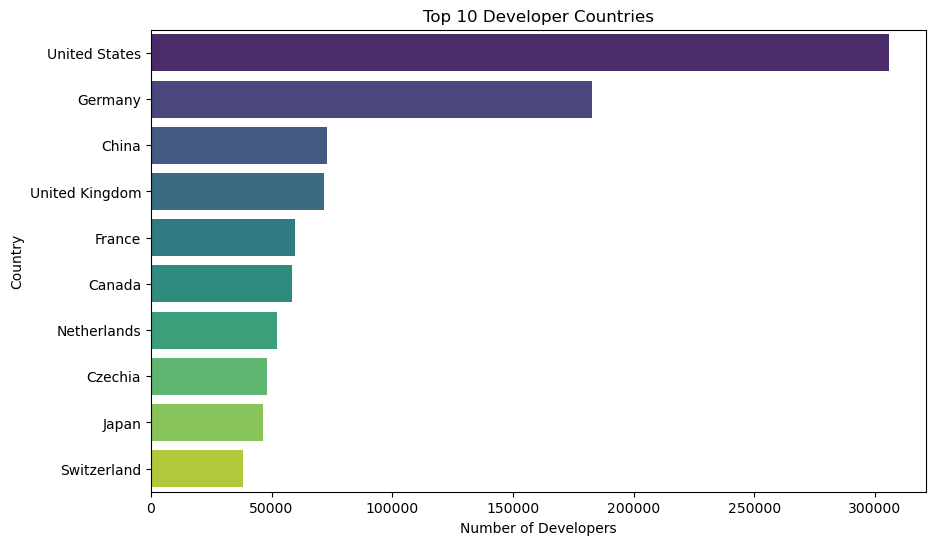

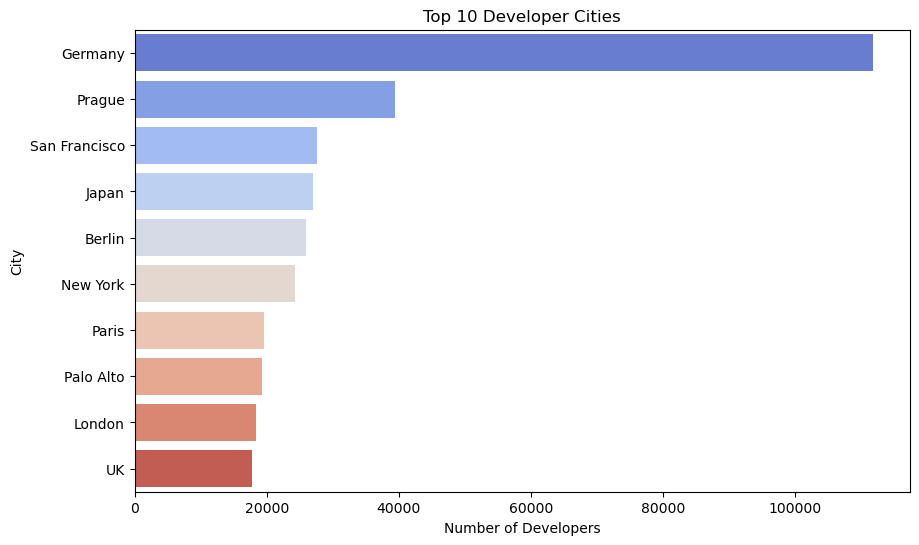

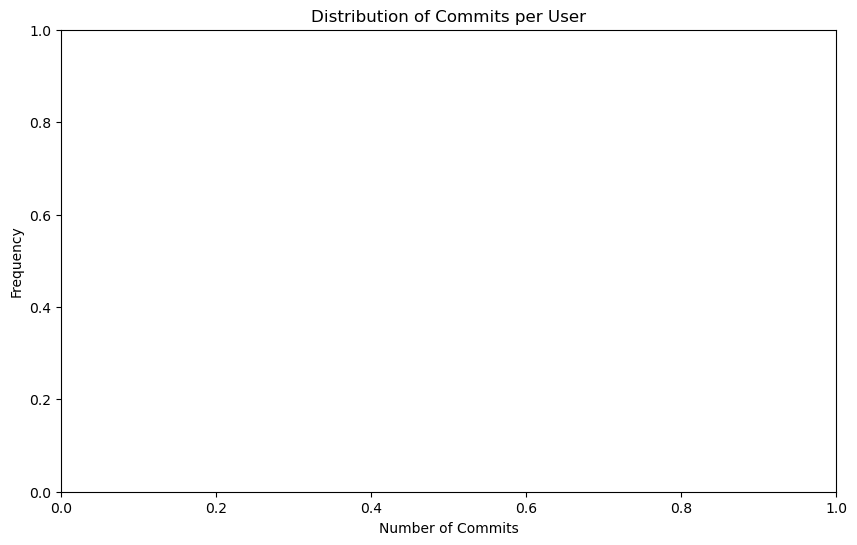

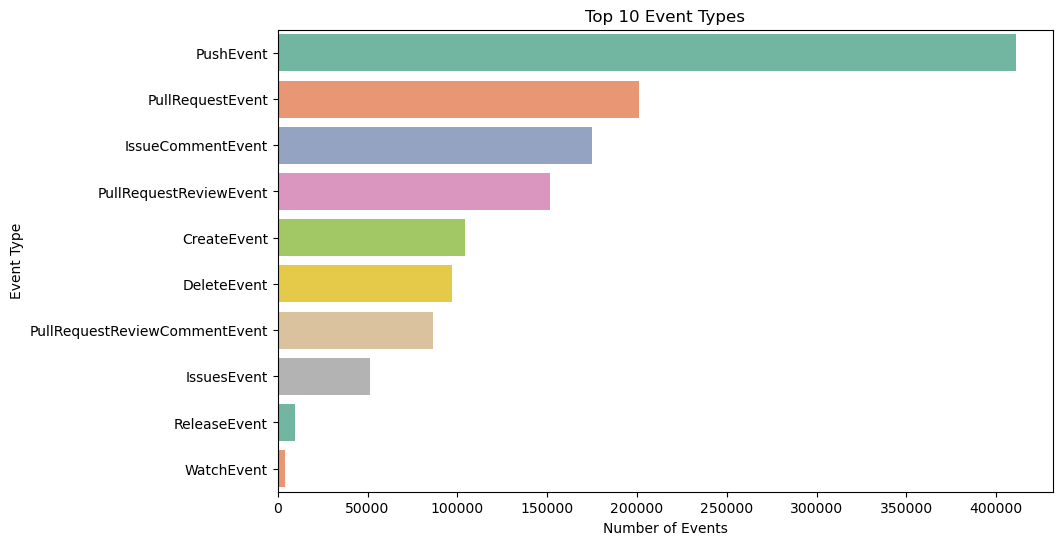

分析完成，结果已保存。


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 文件路径
data_path = r"C:\Users\Lenovo\Desktop\数据导论\users_combined_info_500.csv"

# 加载数据
user_data = pd.read_csv(data_path, encoding='utf-8')

# 数据预览
print("数据前5行：")
print(user_data.head())

# 数据字段调整和预处理
# 从 location 提取城市信息
if 'location' in user_data.columns:
    user_data['city'] = user_data['location'].apply(lambda x: x.split(',')[0] if pd.notna(x) else "Unknown")
else:
    user_data['city'] = "Unknown"

# 检查是否有 country 列
if 'country' not in user_data.columns:
    user_data['country'] = "Unknown"

# 人口统计分析
## 国家和地区分布
country_dist = user_data['country'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=country_dist.values[:10], y=country_dist.index[:10], palette="viridis")
plt.title('Top 10 Developer Countries')
plt.xlabel('Number of Developers')
plt.ylabel('Country')
plt.show()

## 城市分布
city_dist = user_data['city'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=city_dist.values[:10], y=city_dist.index[:10], palette="coolwarm")
plt.title('Top 10 Developer Cities')
plt.xlabel('Number of Developers')
plt.ylabel('City')
plt.show()

# 协作行为分析
## 提交频率（如果存在提交字段）
if 'event_type' in user_data.columns:
    submission_data = user_data[user_data['event_type'] == 'push']  # 假设 'push' 表示提交操作
    submission_counts = submission_data.groupby('user_id').size()
    plt.figure(figsize=(10, 6))
    sns.histplot(submission_counts, bins=50, kde=True, color='blue')
    plt.title('Distribution of Commits per User')
    plt.xlabel('Number of Commits')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'event_type' not found in the dataset.")

## 事件类型统计
event_type_dist = user_data['event_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=event_type_dist.values[:10], y=event_type_dist.index[:10], palette="Set2")
plt.title('Top 10 Event Types')
plt.xlabel('Number of Events')
plt.ylabel('Event Type')
plt.show()

# 数据保存
country_dist.to_csv(r"C:\Users\Lenovo\Desktop\数据导论\country_distribution.csv")
city_dist.to_csv(r"C:\Users\Lenovo\Desktop\数据导论\city_distribution.csv")
print("分析完成，结果已保存。")

